# Guia do Simulador 
##### Este documento tem como objetivo apresentar o funcionamento detalhado de uma simulação de rede quântica, abordando cada uma das camadas envolvidas: física, de enlace, de rede, de transporte e de aplicação.


In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
import random

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


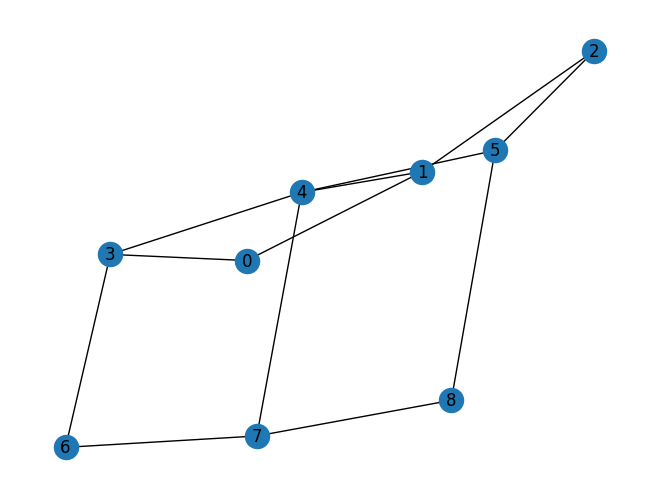

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()
Logger.activate(Logger)

##### Primeiramente, vamos definir os hosts de Alice e Bob.

In [3]:
alice = rede.get_host(3)
bob = rede.get_host(4)

##### Será, então, realizado o protocolo de criação de entrelaçamento entre Alice e Bob.

In [4]:
rede.physical.entanglement_creation_heralding_protocol(alice,bob)

2024-11-17 15:34:43,732: Timeslot 1: Par epr criado com fidelidade 0.02167094626305194
2024-11-17 15:34:43,734: Timeslot 2: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.


False

##### Ao enviar uma solicitação(request) para a rede, se a fidelidade dos qubits for superior a 0.5, a rede aceita a conexão e envia a chave. Caso contrário, uma nova tentativa de entrelaçamento é realizada. Se a tentativa falhar novamente, a rede tenta purificar o entrelaçamento para recuperar a conexão.

In [5]:
rede.linklayer.request(1,2)

2024-11-17 15:34:43,761: Timeslot 3: Tentativa de emaranhamento entre 1 e 2.
2024-11-17 15:34:43,764: Timeslot 4: Par epr criado com fidelidade 0.019459745649192606
2024-11-17 15:34:43,766: Timeslot 5: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.
2024-11-17 15:34:43,770: Timeslot 5: Entrelaçamento falhou entre 1 e 2 na tentativa 1.
2024-11-17 15:34:43,772: Timeslot 6: Tentativa de emaranhamento entre 1 e 2.
2024-11-17 15:34:43,774: Timeslot 7: Par epr criado com fidelidade 0.12292832936610033
2024-11-17 15:34:43,776: Timeslot 8: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.
2024-11-17 15:34:43,777: Timeslot 8: Entrelaçamento falhou entre 1 e 2 na tentativa 2.
2024-11-17 15:34:43,779: A purificação utilizada foi tipo 1.
2024-11-17 15:34:43,786: Timeslot 9: Purificação falhou no canal (1, 2) devido a baixa fidelidade após purificação.


False

##### Logo, será realizado o entanglement swapping entre Alice e Bob, o que permite criar um par de qubits emaranhados entre dois nós que não têm uma conexão direta de emaranhamento, utilizando pares intermediários.

In [6]:
rede.networklayer.entanglement_swapping(8,0)


2024-11-17 15:34:43,816: Timeslot 10: Buscando rota válida entre 8 e 0.
2024-11-17 15:34:43,819: Rota válida encontrada: [8, 5, 2, 1, 0]
2024-11-17 15:34:43,822: Timeslot 11: Realizando Entanglement Swapping.
2024-11-17 15:34:43,824: Entanglement Swapping falhou entre 8-5 e 5-2


False

##### A função a seguir é chamada para que seja realizada a requesição de uma rota para que haja a transmissão de n qubits necessários. Ela vai executar toda a camada de transporte.

In [7]:
rede.transportlayer.run_transport_layer(0,8,11)

2024-11-17 15:34:43,887: Número insuficiente de qubits na memória de Alice (Host 0). Criando mais 1 qubits para completar os 11 necessários.
2024-11-17 15:34:43,890: Timeslot antes da criação do qubit: 12
2024-11-17 15:34:43,892: Qubit 90 adicionado à memória do Host 0.
2024-11-17 15:34:43,894: Qubit 90 criado com fidelidade inicial 0.3564731920965152 e adicionado à memória do Host 0.
2024-11-17 15:34:43,895: Qubit criado para Alice (Host 0) no timeslot: 13
2024-11-17 15:34:43,897: Tentativa 1 de transmissão de qubits entre 0 e 8.
2024-11-17 15:34:43,899: Timeslot 14: Buscando rota válida entre 0 e 8.
2024-11-17 15:34:43,901: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-11-17 15:34:43,905: Teletransporte de qubit de 0 para 8 na rota [0, 3, 6, 7, 8] foi bem-sucedido com fidelidade final de 0.03642184800532178.
2024-11-17 15:34:43,906: Timeslot 15: Buscando rota válida entre 0 e 8.
2024-11-17 15:34:43,908: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-11-17 15:34:43,910: Teletransporte de

True

##### Por meio da chamada da função qks_e91_protocol, passando os argumentos do ID de Alice, ID de Bob e o número de chaves que é pedido nessa requisição. Houve a transmissão das chaves. 

In [8]:
rede.application_layer.run_app("QKD_E91",0,8,5)

2024-11-17 15:34:44,023: Iniciando protocolo E91 com 10 qubits.
2024-11-17 15:34:44,025: Timeslot incrementado na função prepare_e91_qubits: 25
2024-11-17 15:34:44,027: Qubits preparados com a chave: [1, 1, 0, 1, 1, 1, 0, 1, 0, 0] e bases: [0, 0, 1, 0, 1, 0, 0, 1, 0, 0]
2024-11-17 15:34:44,029: Número insuficiente de qubits na memória de Alice (Host 0). Criando mais 10 qubits para completar os 10 necessários.
2024-11-17 15:34:44,030: Timeslot antes da criação do qubit: 26
2024-11-17 15:34:44,031: Qubit 91 adicionado à memória do Host 0.
2024-11-17 15:34:44,033: Qubit 91 criado com fidelidade inicial 0.7244743623042108 e adicionado à memória do Host 0.
2024-11-17 15:34:44,035: Qubit criado para Alice (Host 0) no timeslot: 27
2024-11-17 15:34:44,037: Timeslot antes da criação do qubit: 28
2024-11-17 15:34:44,039: Qubit 92 adicionado à memória do Host 0.
2024-11-17 15:34:44,041: Qubit 92 criado com fidelidade inicial 0.9110154054661314 e adicionado à memória do Host 0.
2024-11-17 15:34:44

[1, 1, 1, 1, 0]

##### Nessa função get_teleported_qubits, pode-se analisar os qubits teletransportados. 

In [9]:
rede.transportlayer.get_teleported_qubits()

[{'alice_id': 0,
  'bob_id': 8,
  'route': [0, 3, 6, 7, 8],
  'fidelity_alice': 0.15920871807980852,
  'fidelity_route': 0.2287679245496101,
  'F_final': 0.03642184800532178,
  'timeslot': 14,
  'qubit': <quantumnet.objects.qubit.Qubit at 0x20396f823c0>},
 {'alice_id': 0,
  'bob_id': 8,
  'route': [0, 3, 6, 7, 8],
  'fidelity_alice': 0.1732019388809111,
  'fidelity_route': 0.2058911320946491,
  'F_final': 0.035660743277179004,
  'timeslot': 15,
  'qubit': <quantumnet.objects.qubit.Qubit at 0x20396f82360>},
 {'alice_id': 0,
  'bob_id': 8,
  'route': [0, 3, 6, 7, 8],
  'fidelity_alice': 0.179591251236713,
  'fidelity_route': 0.1853020188851842,
  'F_final': 0.03327862142827925,
  'timeslot': 16,
  'qubit': <quantumnet.objects.qubit.Qubit at 0x20396f82420>},
 {'alice_id': 0,
  'bob_id': 8,
  'route': [0, 3, 6, 7, 8],
  'fidelity_alice': 0.13997878506278197,
  'fidelity_route': 0.16677181699666577,
  'F_final': 0.023344516325905885,
  'timeslot': 17,
  'qubit': <quantumnet.objects.qubit.Qu

##### A função get_timeslot apresenta quantos timeslot se passaram durante a execução da camada.

In [10]:
rede.get_timeslot()

57

##### Nesta função, get_total_used_erps, será calculado a quantidade de pares EPRs usados na camada de Rede.

In [11]:
rede.get_total_useds_eprs()

2024-11-17 15:34:44,295: Eprs usados na camada PhysicalLayer: 3
2024-11-17 15:34:44,298: Eprs usados na camada LinkLayer: 2
2024-11-17 15:34:44,300: Eprs usados na camada NetworkLayer: 0


5

##### A função get_total_useds_qubits, será usada para mostrar quantos qubits foram usados em todas as camadas.

In [12]:
rede.get_total_useds_qubits()

2024-11-17 15:34:44,340: Qubits usados na camada PhysicalLayer: 17
2024-11-17 15:34:44,343: Qubits usados na camada LinkLayer: 4
2024-11-17 15:34:44,345: Qubits usados na camada TransportLayer: 21
2024-11-17 15:34:44,346: Qubits usados na camada ApplicationLayer: 10


52

##### No avg_fidelity_on_linklayer, é realizada o cálculo da média da fidelidade dos ERPs criados na camada de Enlace.

In [13]:
rede.linklayer.avg_fidelity_on_linklayer()

2024-11-17 15:34:44,380: A fidelidade média dos EPRs criados na camada de enlace é 0.0002837082879641787


Total de EPRs criados na camada de enlace: 3
Total de fidelidade dos EPRs criados na camada de enlace: 0.000851124863892536


0.0002837082879641787

In [14]:
rede.transportlayer.avg_fidelity_on_transportlayer()

2024-11-17 15:34:44,419: Fidelidade do qubit utilizado de 0 para 8: 0.03642184800532178
2024-11-17 15:34:44,421: Fidelidade do qubit utilizado de 0 para 8: 0.035660743277179004
2024-11-17 15:34:44,424: Fidelidade do qubit utilizado de 0 para 8: 0.03327862142827925
2024-11-17 15:34:44,425: Fidelidade do qubit utilizado de 0 para 8: 0.023344516325905885
2024-11-17 15:34:44,427: Fidelidade do qubit utilizado de 0 para 8: 0.00877184717959737
2024-11-17 15:34:44,428: Fidelidade do qubit utilizado de 0 para 8: 0.013985430385099803
2024-11-17 15:34:44,430: Fidelidade do qubit utilizado de 0 para 8: 0.0014992922714750735
2024-11-17 15:34:44,431: Fidelidade do qubit utilizado de 0 para 8: 0.011142300668516321
2024-11-17 15:34:44,433: Fidelidade do qubit utilizado de 0 para 8: 0.008061195249667238
2024-11-17 15:34:44,434: Fidelidade do qubit utilizado de 0 para 8: 0.0011033236633316715
2024-11-17 15:34:44,435: Fidelidade do qubit utilizado de 0 para 8: 0.008923078331789062
2024-11-17 15:34:44,43

0.009007159953938994

##### Pode-se gerar um arquivo em csv, print ou variável para setar métricas escolhidas pelo próprio usuário. 

In [15]:
# rede.get_metrics(file_name="teste.csv")

##### Por meio do display_all_qubits_timeslot, pode-se verificar em qual timeslot cada qubit foi criado.

In [16]:
rede.display_all_qubit_timeslots()

Qubit 0 foi criado no timeslot 0 na camada Physical Layer
Qubit 1 foi criado no timeslot 0 na camada Physical Layer
Qubit 2 foi criado no timeslot 0 na camada Physical Layer
Qubit 3 foi criado no timeslot 0 na camada Physical Layer
Qubit 4 foi criado no timeslot 0 na camada Physical Layer
Qubit 5 foi criado no timeslot 0 na camada Physical Layer
Qubit 6 foi criado no timeslot 0 na camada Physical Layer
Qubit 7 foi criado no timeslot 0 na camada Physical Layer
Qubit 8 foi criado no timeslot 0 na camada Physical Layer
Qubit 9 foi criado no timeslot 0 na camada Physical Layer
Qubit 10 foi criado no timeslot 0 na camada Physical Layer
Qubit 11 foi criado no timeslot 0 na camada Physical Layer
Qubit 12 foi criado no timeslot 0 na camada Physical Layer
Qubit 13 foi criado no timeslot 0 na camada Physical Layer
Qubit 14 foi criado no timeslot 0 na camada Physical Layer
Qubit 15 foi criado no timeslot 0 na camada Physical Layer
Qubit 16 foi criado no timeslot 0 na camada Physical Layer
Qubit 1